In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

noise = 0.01


In [11]:
pipe = make_pipeline(StandardScaler(), gpr)
pipe

NameError: name 'make_pipeline' is not defined

In [2]:
dt = pd.read_csv('../records/initial.csv')
dt.drop('Unnamed: 0', axis = 1, inplace= True)
X = dt.iloc[:, :-1]
Y = dt.iloc[:, -1]
X = np.array(X)
Y = np.array(Y)

In [10]:
# 划分train test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)


array([46.3, 44.6, 12. , ..., 44.9, 15.3, 40.1])

In [ ]:
pipe.fit(X_train, y_train)

In [6]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(
            num_leaves=2**5-1, reg_alpha=0.25, reg_lambda=0.25, objective='binary',
            max_depth=-1, learning_rate=0.005, min_child_samples=3, random_state=2021,
            n_estimators=2000, subsample=1, colsample_bytree=1,
        )


In [19]:
# import seaborn as sns

# dt.iloc[:, dt['theta']==45]
mask = (dt['Elevators']<=46)
mask2 = dt['rou']==90
mask3 = dt['Weight']==0
mask4 = dt['theta']<=38
mask5 = dt['theta']>=38

dmask = dt[mask2 & mask4 & mask5]

# dmask = dmask[dmask['rou']==90]
# dmask = dmask[dmask['Elevators']==40]
dmask


,Weight,Elevators,theta,rou,result
28,48,58,38,90,44.0
39,27,26,38,90,36.7
120,12,36,38,90,46.4
136,45,18,38,90,12.0
143,96,22,38,90,10.8
...,...,...,...,...,...
29059,51,52,38,90,45.0
29069,69,34,38,90,30.6
29120,3,14,38,90,16.9
29216,51,60,38,90,43.9


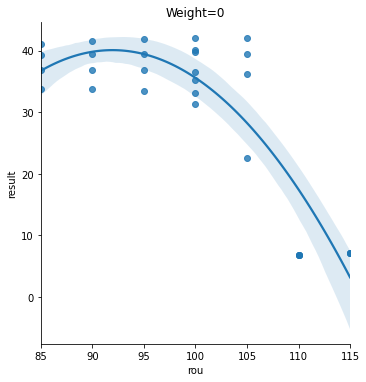

In [145]:
g = sns.lmplot(x="rou", y="result", data=dmask, order=2)
# plt.xlim((0,115))
plt.title("Weight=0")
g.savefig('../Images/rou1.png')

In [66]:
#唯一值个数
for i in dt.columns:
    print(i, dt[i].nunique(), dt[i].max(), dt[i].min())

Weight 83 100 0
Elevators 72 100 0
theta 14 55 25
rou 16 120 45
result 452 48.9 0.1


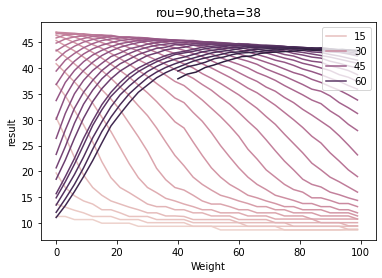

In [20]:
#使用标记而不是破折号来识别组
ax = sns.lineplot(x="Weight", y="result",hue="Elevators",ci=0,
markers=True, dashes=False, data=dmask)
plt.legend(loc="upper right")
plt.title("rou=90,theta=38")
plt.savefig('../Images/weight与ele.png')